In [22]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from wordcloud import WordCloud

In [23]:
# Upload data csv
from google.colab import files
uploaded = files.upload()

Saving tanggapan_lampung_100.csv to tanggapan_lampung_100 (3).csv


In [24]:
# Baca dataset
df = pd.read_csv(next(iter(uploaded)))

In [25]:
# Diterapkan preprocessing dasar: menghapus duplikat, dan menggunakan stopword Bahasa Indonesia.
stopwords_indo = set([
    "yang", "di", "dan", "ke", "dari", "untuk", "pada", "dengan", "adalah", "saya", "itu",
    "ini", "karena", "seperti", "juga", "sudah", "masih", "akan", "tersebut", "bisa",
    "dalam", "tidak", "oleh", "lebih", "kurang", "setiap", "atau", "kota", "daerah"
])

Teks dianalisis menggunakan TF-IDF dan dilakukan clustering dengan KMeans menjadi 3 klaster.

In [26]:
# TF-IDF (Mengubah teks pada kolom tanggapan menjadi vektor numerik berdasarkan bobot TF-IDF. Stopwords akan dihapus)

vectorizer = TfidfVectorizer(stop_words=list(stopwords_indo))
tfidf = vectorizer.fit_transform(df['tanggapan'])

In [27]:
# Cosine Similarity (Mengukur kesamaan antar semua tanggapan berdasarkan representasi TF-IDF)

cos_sim = cosine_similarity(tfidf)

In [28]:
# Clustering (Mengelompokkan tanggapan ke dalam 3 klaster berdasarkan kesamaan konten)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(tfidf)

**WordCloud per Cluster**
- Menghasilkan visualisasi kata-kata yang sering muncul pada tiap klaster.

- Kata yang lebih besar menunjukkan frekuensi yang lebih tinggi dalam klaster tersebut.

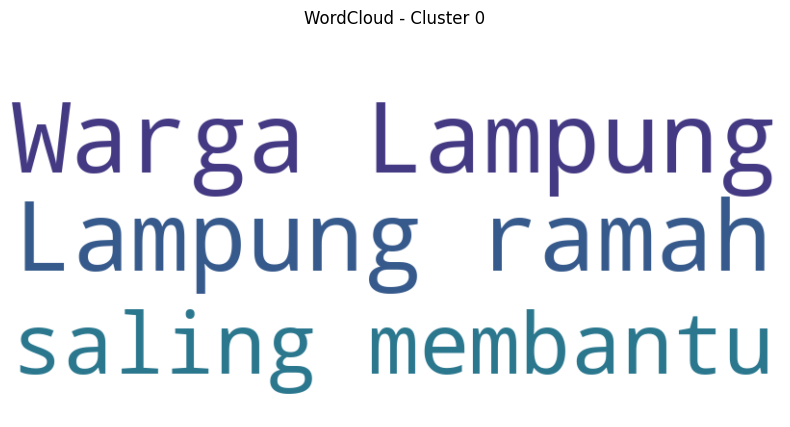

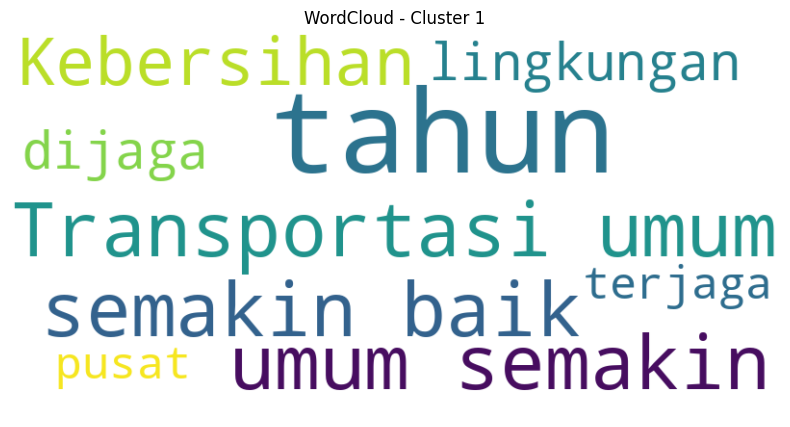

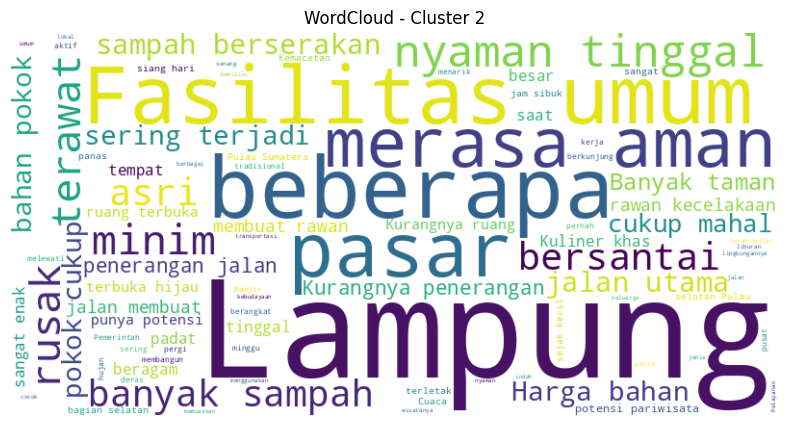

In [29]:
# Untuk memahami kata dominan dalam setiap klaster, dibuat WordCloud per klaster
for i in range(3):
    cluster_text = ' '.join(df[df['Cluster'] == i]['tanggapan'])
    wc = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_indo).generate(cluster_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud - Cluster {i}")
    plt.show()

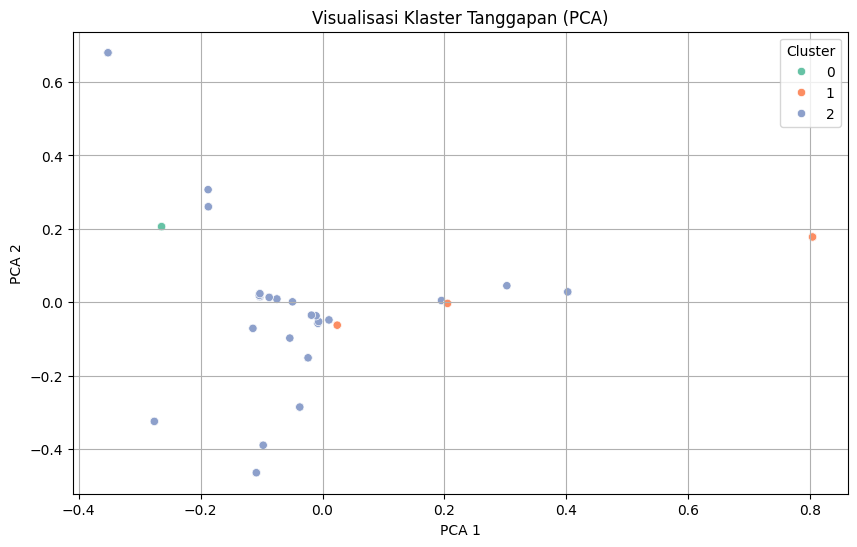

In [ ]:
# --- PCA Visualisasi Cluster ---
pca = PCA(n_components=2)
reduced = pca.fit_transform(tfidf.toarray())
df['PCA1'] = reduced[:, 0]
df['PCA2'] = reduced[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("Visualisasi Klaster Tanggapan (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

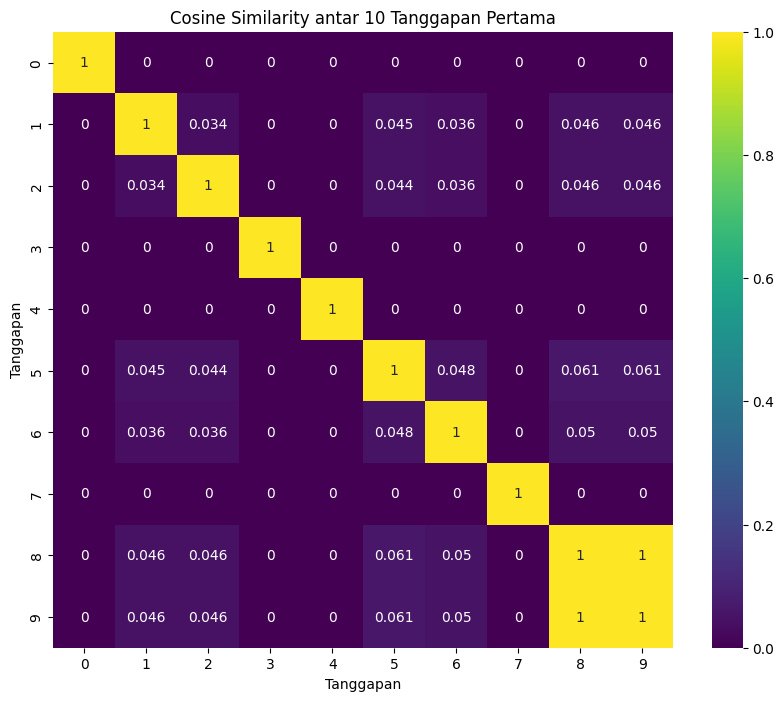

In [ ]:
# --- Heatmap Cosine Similarity ---
plt.figure(figsize=(10, 8))
sns.heatmap(cos_sim[:10, :10], annot=True, cmap='viridis')
plt.title("Cosine Similarity antar 10 Tanggapan Pertama")
plt.xlabel("Tanggapan")
plt.ylabel("Tanggapan")
plt.show()